[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-username/your-repository/blob/main/path/to/your_notebook.ipynb)

# JOBSHEET 4 - KLASTERISASI

Nama     : Hanif Faishal Hilmi

Kelas    : TI 3F

### PRAKTIKUM 1

#### Langkah 1 - Import Library

In [1]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Langkah 2 - Load dan Inspeksi Data

In [2]:

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Melakukan inspeksi profile data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Langkah 3 - Seleksi Fitur

In [4]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Cek data fitur dengan

In [5]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


#### Langkah 4 - Plotting

Pada tahap ini, kita akan melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu SepalLengthCm dan SepalWidthCm.

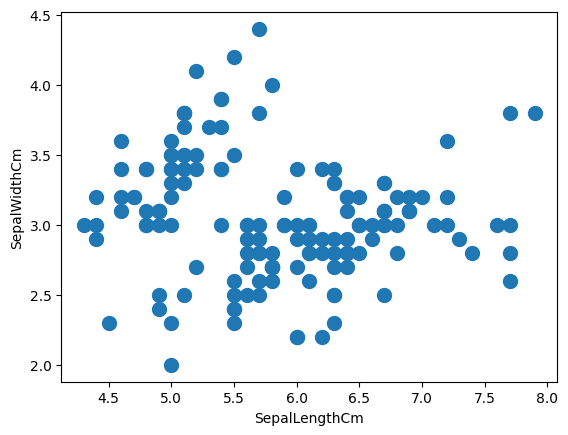

In [6]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

#### Langkah 5 - Membuat Model K-Means

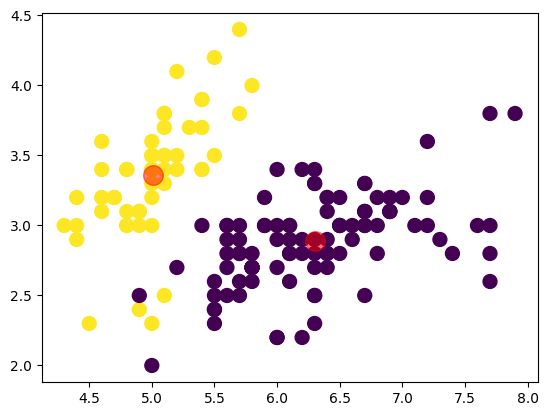

In [7]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#### Langkah 6 - Evaluasi Model

In [8]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


#### Langkah 7 - Menentukan k terbaik dengan Elbow Method

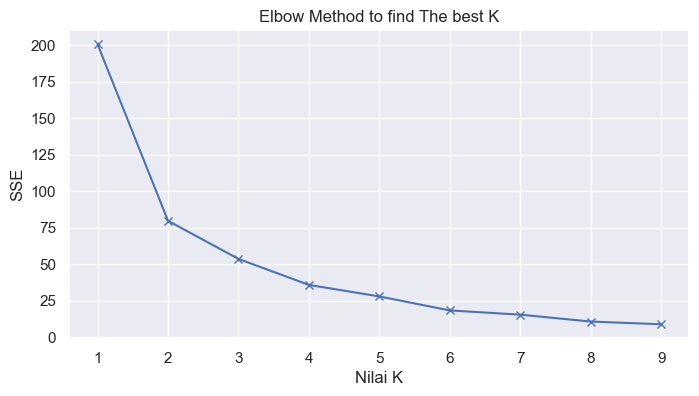

In [28]:
# List nilai SSE
sse = []

# cari k terbaik dari 1-10
K = range(1, 10)

# cek nilai SSE untuk tiap K
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# plot nilai SSE
plt.figure(figsize=(8,4))
plt.plot(K, sse, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('SSE')
plt.title('Elbow Method to find The best K')
plt.show()

### PRAKTIKUM 2

#### Langkah 0 - Import Library

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Langkah 1 - Membuat Dataset Sintentis


In [31]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

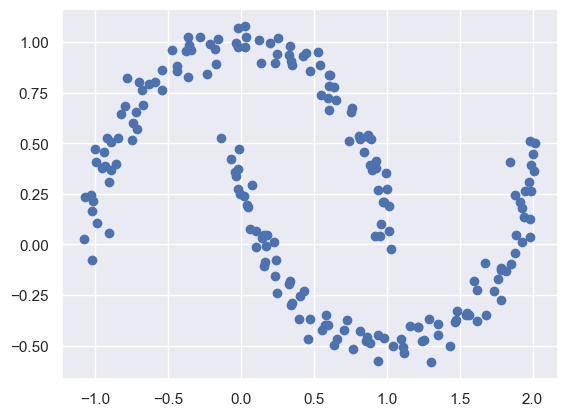

In [32]:
plt.scatter(X[:, 0], X[:, 1])

#### Langkah 2 - Klasterisasi dengan K-Means

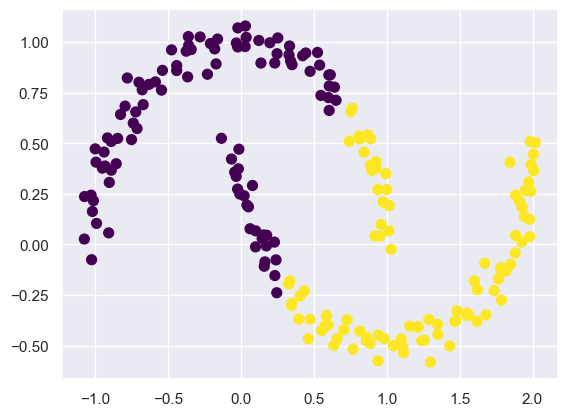

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Terdapat beberapa data yang tidak terklasterisasi secara tepat. Anda dapat dengan mudah membayangkan garis imager linear yang digunakan untuk memisahkan 2 cluster data. Lakukan evaluasi lebih lanjut dengan menggunakan silhouette coefficient.

In [34]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


#### Langkah 3 - Klasterisasi dengan DBSCAN

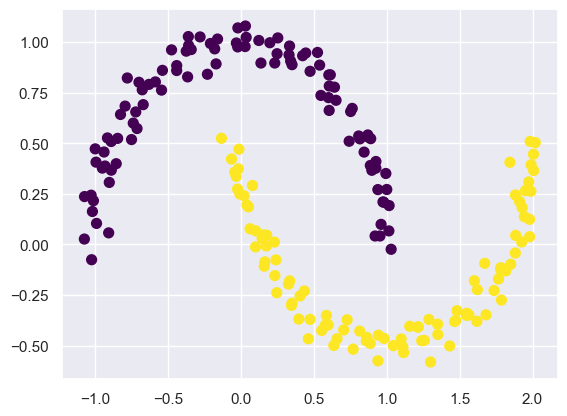

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Berdasarkan scatterplot, data dapat terklasterisasi dengan sangat baik. Untuk memastikannya, kita perlu melakukan evaluasi kembali dengan silhouette score.

In [36]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Hasil 0.32585318950197517

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik. Lalu evaluasi apa yang bisa kita lakukan? Secara sederhana,

Prosentase data noise

Inspeksi visual

Secara metric dapat menggunakan,

Davies-Bouldin Index (DBI) --> fokus pada separasi indeks, semakin kecil semakin baik, rentang 0 hingga tak hingga.

In [37]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


### PRAKTIKUM 3

#### Langkah 0 - Import Library

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Langkah 1 - Load Data Citra

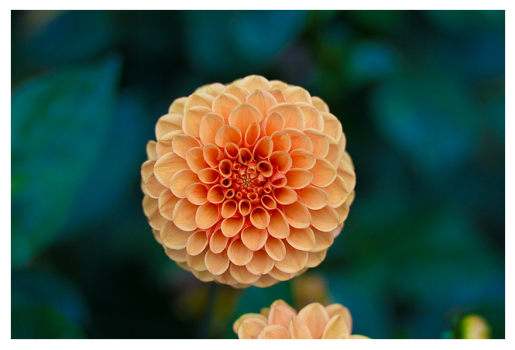

In [39]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

#### Langkah 2 - Preprocessing

In [40]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


#### Langkah 3 - Cek Sebaran Warna

In [41]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Panggil fungsi untuk mengetahui sebaran warna,

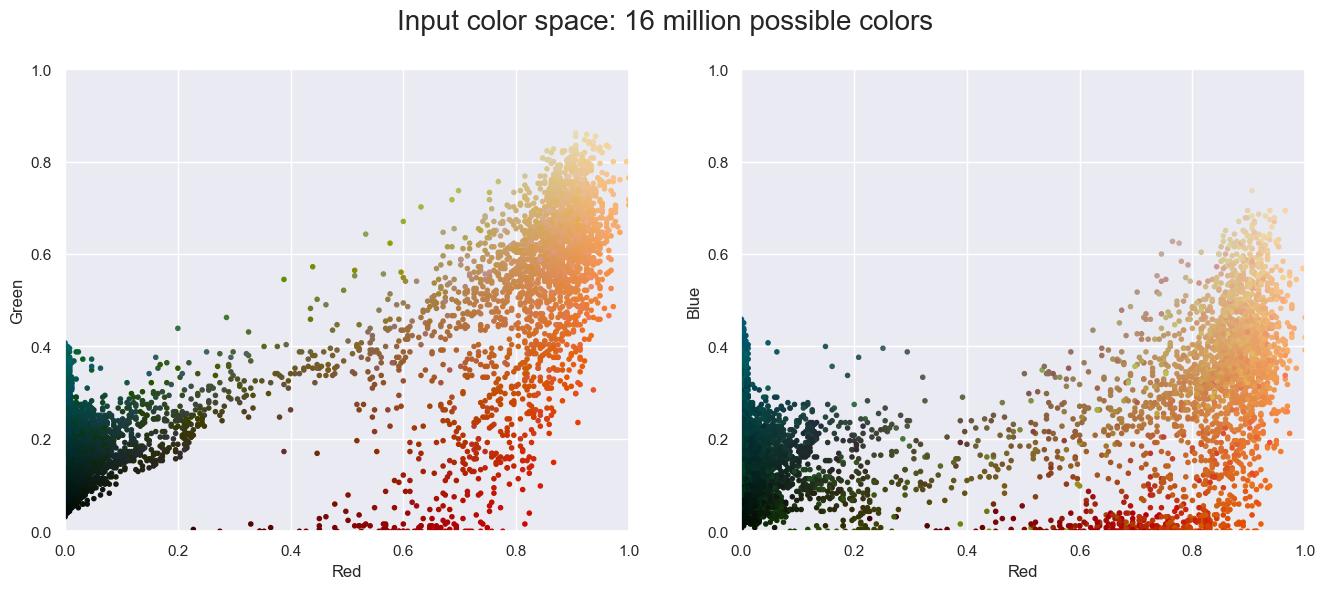

In [42]:
plot_pixels(data, title='Input color space: 16 million possible colors')

#### Langkah 4 - Klasterisasi Warna

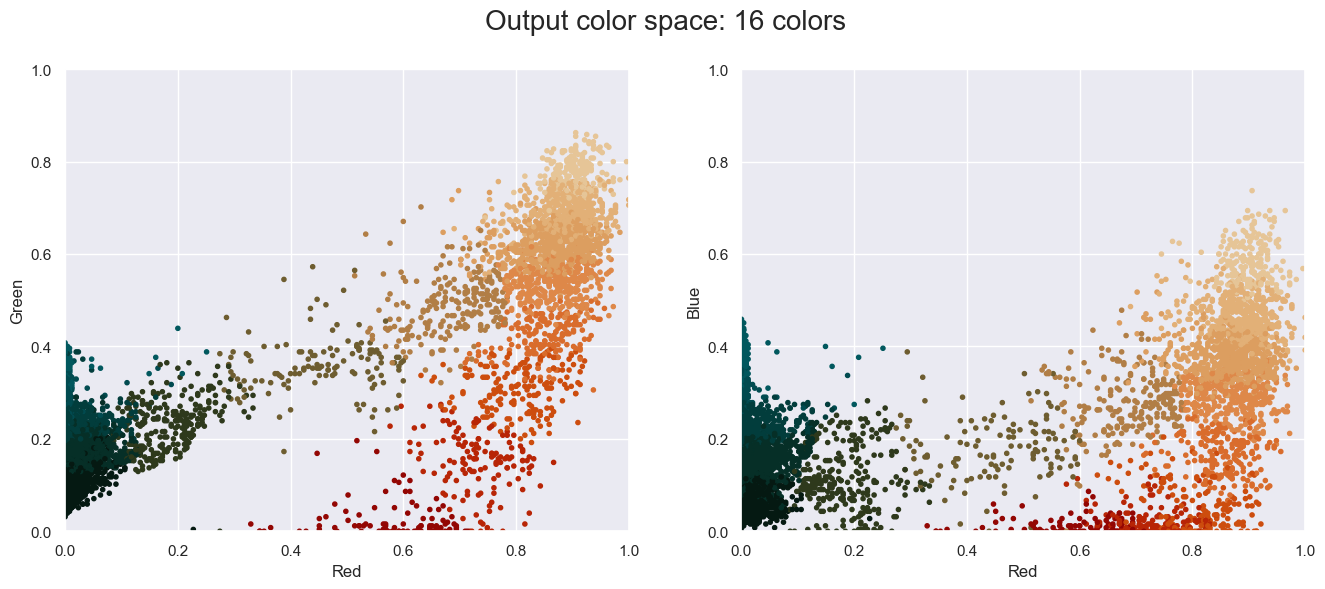

In [43]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, title='Output color space: 16 colors', colors=new_colors)

Hasil perbandingan warna citra sebelum dan setelah kompresi adalah sebagai berikut,

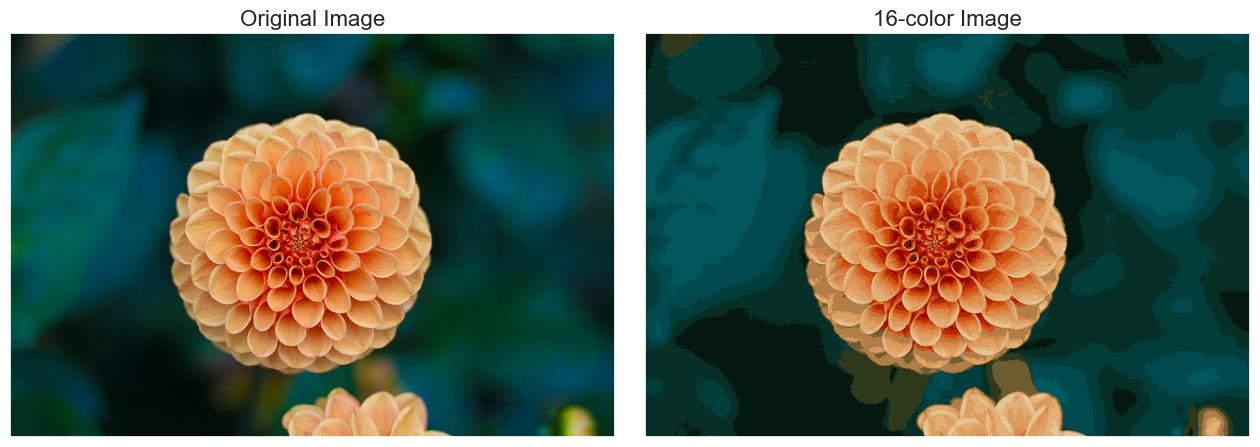

In [45]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);